In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\bhave\Downloads\datasets\project\loan recovery\loan-recovery.csv')

In [3]:
df.head(3)

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No


In [4]:
df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
columns = ['Monthly_Income', 'Loan_Amount', 'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI',]

for col in columns:
    df[col] = df[col] / 1000  # Convert to 'k $'
    


# Analyzing Data Distribution and Relationships

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# # Convert loan amount from $ to thousands of dollars (k $)
# df['Loan_Amount'] = df['Loan_Amount'] / 1000

C:\Users\bhave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


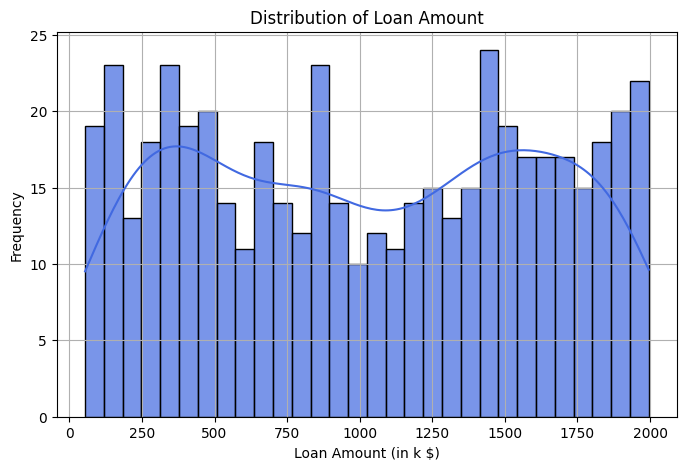

In [9]:

plt.figure(figsize =(8,5))
sns.histplot(df['Loan_Amount'],bins = 30 , kde = True , color = 'royalblue', alpha = 0.7)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount (in k $)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

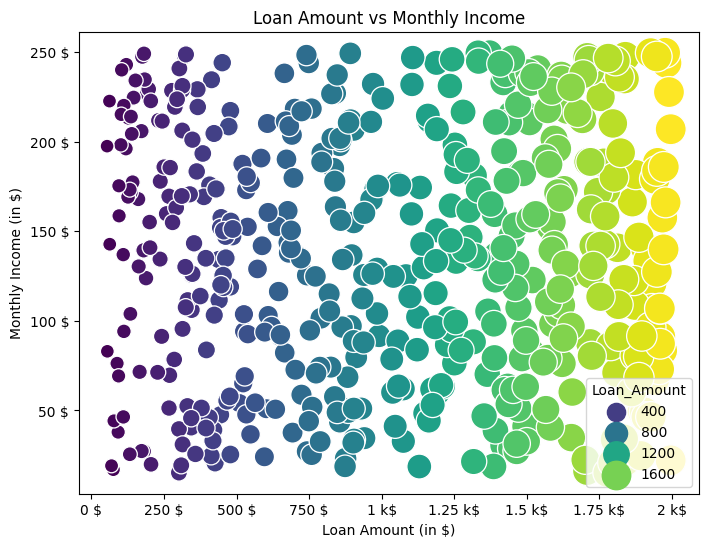

In [10]:
# Plot 3: Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Loan_Amount', y='Monthly_Income',
                hue='Loan_Amount', palette='viridis', size='Loan_Amount', sizes=(100, 500))

plt.title("Loan Amount vs Monthly Income")
plt.xlabel("Loan Amount (in $)")
plt.ylabel("Monthly Income (in $)")

from matplotlib.ticker import EngFormatter

ax = plt.gca()
ax.xaxis.set_major_formatter(EngFormatter(unit="$"))
ax.yaxis.set_major_formatter(EngFormatter(unit="$"))

The graph demonstrates a positive relationship between loan amounts and monthly income, indicating that individuals with higher income levels tend to secure larger loans. 
It highlights the proportionality between income and loan size, which shows an income-based approach in loan approvals or customer profiling.

# Analyzing Payment History

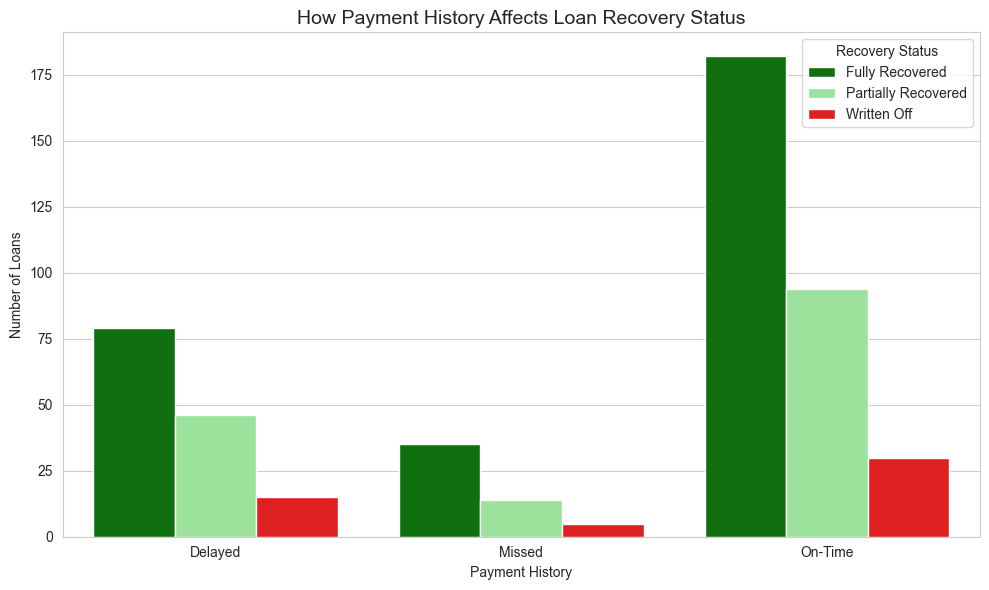

In [11]:
# Grouped data: count of loans by Payment_History and Recovery_Status
grouped = df.groupby(['Payment_History', 'Recovery_Status']).size().reset_index(name='Count')

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create grouped barplot
sns.barplot(data=grouped, x='Payment_History', y='Count', hue='Recovery_Status',
            palette={'Partially Recovered': 'lightgreen', 'Written Off': 'red', 'Fully Recovered': 'green'})

# Titles and labels
plt.title("How Payment History Affects Loan Recovery Status", fontsize=14)
plt.xlabel("Payment History")
plt.ylabel("Number of Loans")
plt.legend(title="Recovery Status")
plt.tight_layout()

# Show the plot
plt.show()

Loans with on-time payments are mostly fully recovered. 

Delayed payments result in a mix of partial and full recoveries, with some written off. 

Missed payments have a significantly lower recovery rate, with most loans ending up either partially recovered or written off.

# how missed payments affect loan recovery

C:\Users\bhave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhave\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


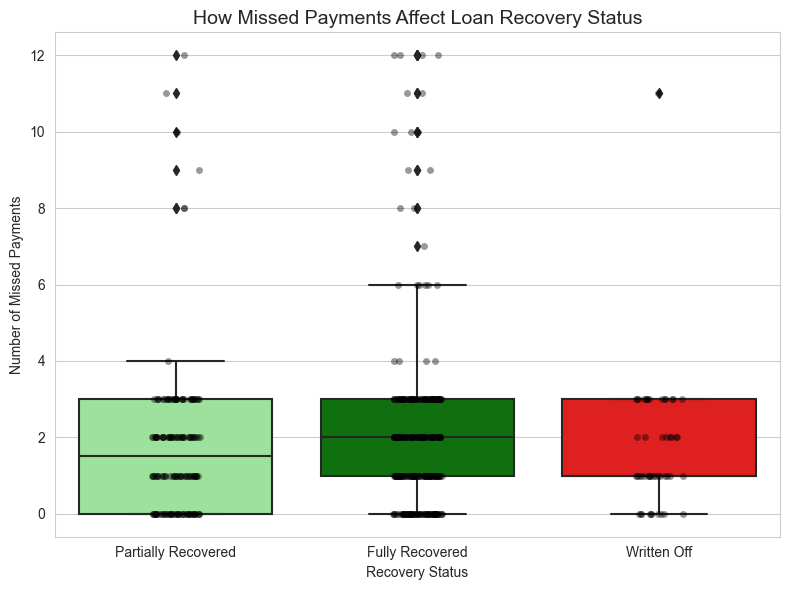

In [12]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Boxplot with swarm of individual points
sns.boxplot(data=df, x="Recovery_Status", y="Num_Missed_Payments",
           palette={'Partially Recovered': 'lightgreen', 'Written Off': 'red', 'Fully Recovered': 'green'})

# Show all points (like points="all" in Plotly)
sns.stripplot(data=df, x="Recovery_Status", y="Num_Missed_Payments",
              color="black", alpha=0.4, jitter=True)

# Titles and labels
plt.title("How Missed Payments Affect Loan Recovery Status", fontsize=14)
plt.xlabel("Recovery Status")
plt.ylabel("Number of Missed Payments")
plt.tight_layout()
plt.show()






Even fully recovered loans can have a higher number of missed payments, while partially recovered loans usually have fewer missed payments. Surprisingly, even written off loans may not always have the most missed payments, indicating other risk factors may contribute to a write-off.



# Analyzing Loan Recovery Based on Monthly Income

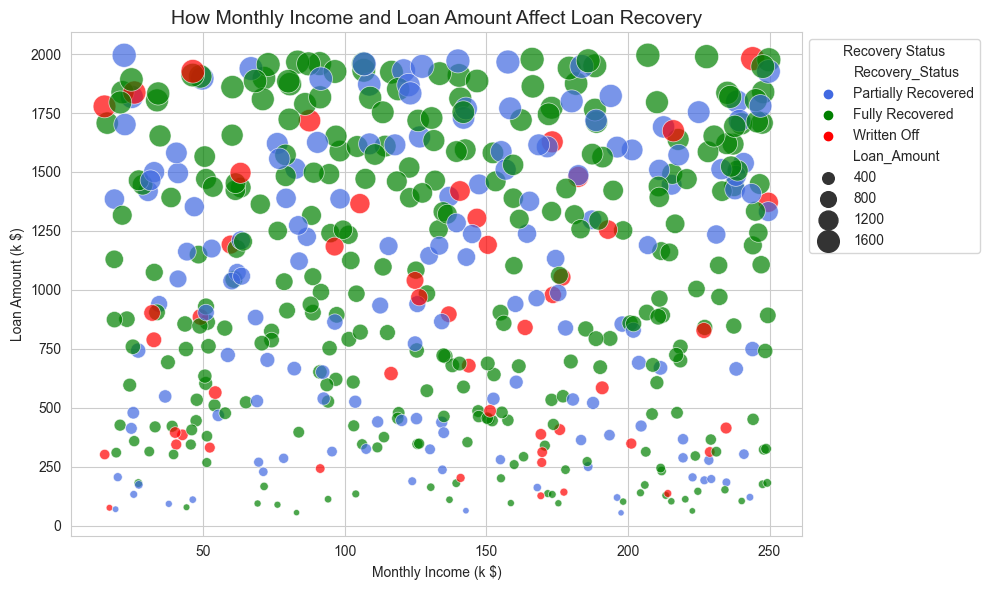

In [13]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
   
scatter = sns.scatterplot(
            data = df,
            x='Monthly_Income' , y ='Loan_Amount',
            hue = 'Recovery_Status' , size = 'Loan_Amount',
            palette={'Partially Recovered': 'royalblue', 'Written Off': 'red', 'Fully Recovered': 'green'},
            alpha = 0.7 , sizes=(20,300))

plt.title("How Monthly Income and Loan Amount Affect Loan Recovery", fontsize=14)
plt.xlabel("Monthly Income (k $)")
plt.ylabel("Loan Amount (k $)")
plt.legend(title='Recovery Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Higher-income individuals are more likely to fully recover their loans, even for larger amounts. Borrowers in lower income brackets face a higher likelihood of loan write-offs or partial recovery. This trend highlights the impact of income on loan recovery, as higher earnings lead to better repayment outcomes and fewer write-offs, even for substantial loans.

# using K-Means clustering, creating borrower segments based on monthly income and loan amount

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [15]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Borrower_Segment'] = kmeans.fit_predict(df_scaled)


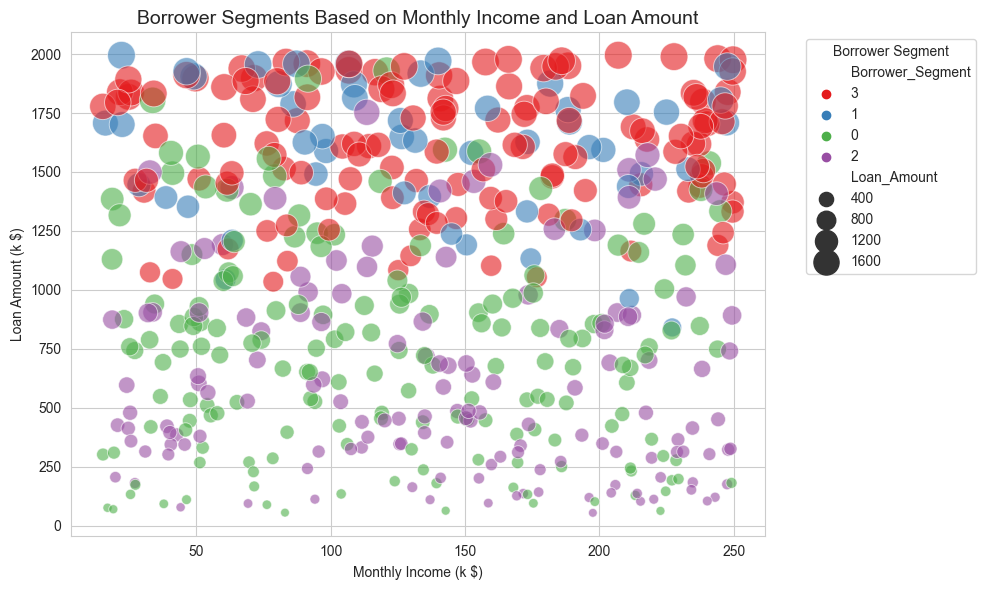

In [16]:

# df['Borrower_Segment'] = df['Borrower_Segment'].astype(str)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot using seaborn (hue = cluster segment, size = loan amount)
sns.scatterplot(
    data=df,
    x='Monthly_Income',y='Loan_Amount',
    hue=df['Borrower_Segment'].astype(str)  # Ensure Borrower_Segment is treated as a category
    ,size='Loan_Amount',sizes=(40, 400),
    palette='Set1', alpha=0.6)


plt.title("Borrower Segments Based on Monthly Income and Loan Amount", fontsize=14)
plt.xlabel("Monthly Income (k $)")
plt.ylabel("Loan Amount (k $)")
plt.legend(title='Borrower Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### 📘 Segment 1 – Financially Stable Borrowers
- **Loan Behavior**: Tend to take on **moderate to high loan amounts**.
- **Income Range**: Mostly **mid-to-high income** individuals.
- **Insight**: Reflects **financial stability** with higher repayment capacity.

---

### 🟢 Segment 0 – Strained but Active Borrowers
- **Loan Behavior**: Mostly opt for **moderate loans**.
- **Income Range**: Primarily found in **lower-income brackets**.
- **Insight**: Potential **financial strain**; may need careful risk evaluation.

---

### 🟣 Segment 2 – Balanced and Cautious Group
- **Loan Behavior**: **Even distribution** across loan sizes.
- **Income Range**: Spread across all income levels.
- **Insight**: Represents a **balanced** group, neither overly risky nor high-performing.

---

### 🔴 Segment 3 – High Loan, High Income – Risky Borrowers
- **Loan Behavior**: Prefer **large loan amounts**.
- **Income Range**: Concentrated among **high-income earners**.
- **Insight**: Despite strong income, high loan sizes suggest **potential repayment risk** if not managed properly.



In [17]:
# updating segment names
df['Segment_Name'] = df['Borrower_Segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})

# Building an Early Detection System for Loan Defaults based on the Risk Scores


In [18]:
from sklearn.model_selection import train_test_split

df["High_Risk_Flag"] = df['Segment_Name'].apply(lambda x:1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

# selecting features for the model
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = df[features]
y = df['High_Risk_Flag']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# training the model
rf = RandomForestClassifier(n_estimators=  100 , random_state = 42)
rf.fit(X_train , y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Model evalution on test data
from sklearn.metrics import *

pred_rf = rf.predict(X_test)

tab_rf = confusion_matrix( y_test, pred_rf)
tab_rf
print(classification_report(y_test , pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.95      0.92      0.93        62

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [21]:
# get risk scores (probability of being high risk)
risk_scores = rf.predict_proba(X_test)[:,1] # probability of high risk

# add risk scores and flags to test data
df_test = X_test.copy()
df_test['Risk_Score'] = risk_scores
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)   # Threshold at 50% probability


In [22]:
# Merge borrower details into df_test
df_test = df_test.merge(
    df[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
    left_index=True, right_index=True)

# Reorder columns for easy handling
first_cols = ['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']

# Get the rest of the columns
other_cols = [col for col in df_test.columns if col not in first_cols]

# Reorder
df_test = df_test[first_cols + other_cols]


In [23]:
df_test.head(2)

,Borrower_ID,Segment_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk
436,BRW_437,"High Loan, Higher Default Risk",Partially Recovered,Legal Notice,7,No,25,156.826,1510.049,60,16.22,837.340182,329.600124,5.49334,1,179,0.42,0
448,BRW_449,"Moderate Income, High Loan Burden",Fully Recovered,Calls,2,No,57,33.752,1803.767,12,8.30,0.000000,441.147749,36.76231,0,0,0.64,1


we first labelled borrowers as high-risk based on their segment classification. Then, we selected key financial and behavioural features to train a Random Forest Classifier. After splitting the data into training and testing sets, we trained the model to predict the probability of a borrower defaulting. We then applied this model to the test data to generate risk scores and classify borrowers as high-risk or low-risk based on a probability threshold. Finally, we merged these predictions with borrower details to enable data-driven recovery strategies.

# create a new column for the dynamic recovery strategy based on risk scores

In [24]:
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)

df_test.head(2)

,Borrower_ID,Segment_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Recovery_Strategy
436,BRW_437,"High Loan, Higher Default Risk",Partially Recovered,Legal Notice,7,No,25,156.826,1510.049,60,16.22,837.340182,329.600124,5.49334,1,179,0.42,0,Automated reminders & monitoring
448,BRW_449,"Moderate Income, High Loan Burden",Fully Recovered,Calls,2,No,57,33.752,1803.767,12,8.30,0.000000,441.147749,36.76231,0,0,0.64,1,Settlement offers & repayment plans


In [25]:
import joblib

# Save model and scaler
joblib.dump(rf, "loan_risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']